In [1]:
# import dependencies
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import seaborn as sns

%matplotlib inline

In [2]:
HouseDF = pd.read_csv(Path('./Resources/MergedCSV_sql_FLOAT.csv'))

### Added lat and long features to try and increase r value

In [3]:
HouseDF.head()

,Unnamed: 0,abbreviatedaddress,city,zipcode,latitude,longitude,bathrooms,bedrooms,lotsize,date_sold,price,zestimate,avg_income
0,0,4008 SE Kelly St,Portland,97202,45.499569,-122.621201,1,2,4356,5/20/2021,535000,550300,39879.0
1,1,6936 SE 28th Ave,Portland,97202,45.473526,-122.634125,2,4,4791,8/16/2020,775000,874600,39879.0
2,2,1515 SE Claybourne St,Portland,97202,45.475349,-122.650620,1,2,5227,5/4/2021,521000,539700,39879.0
3,3,7941 SE 36th Ave,Portland,97202,45.465736,-122.626526,3,4,6098,12/13/2020,830000,903000,39879.0
4,4,6908 SE Cesar E Chavez Blvd,Portland,97202,45.473179,-122.622284,2,3,6969,8/11/2020,525000,598800,39879.0


In [4]:
House_FT_df = pd.DataFrame(data=HouseDF, columns=['zipcode', 'bathrooms', 'latitude', 'longitude', 'bedrooms', 'price', 'avg_income', 'lotsize'])
House_FT_df.head()

,zipcode,bathrooms,latitude,longitude,bedrooms,price,avg_income,lotsize
0,97202,1,45.499569,-122.621201,2,535000,39879.0,4356
1,97202,2,45.473526,-122.634125,4,775000,39879.0,4791
2,97202,1,45.475349,-122.650620,2,521000,39879.0,5227
3,97202,3,45.465736,-122.626526,4,830000,39879.0,6098
4,97202,2,45.473179,-122.622284,3,525000,39879.0,6969


### ADD ENCODING

### Second round we dropped zero values for bedrooms and bathrooms to try to increase r values

In [5]:
# There's a 0 count for min on bathrooms and bedrooms, needs to be dropped? 
House_FT_df.describe()

,zipcode,bathrooms,latitude,longitude,bedrooms,price,avg_income,lotsize
count,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5.853000e+03,5853.000000,5.853000e+03
mean,97217.857509,2.490518,45.489533,-122.708407,3.430207,6.149140e+05,49129.098240,4.463486e+04
std,8.690304,0.983869,0.057586,0.083097,0.938537,4.318443e+05,11572.849252,2.728182e+06
min,97202.000000,0.000000,45.391903,-122.896439,0.000000,3.000000e+02,38040.000000,0.000000e+00
25%,97211.000000,2.000000,45.441120,-122.789665,3.000000,4.824650e+05,39879.000000,4.791000e+03
50%,97219.000000,3.000000,45.475288,-122.693825,3.000000,5.650000e+05,46558.000000,5.662000e+03
75%,97224.000000,3.000000,45.552853,-122.632034,4.000000,6.900000e+05,58461.000000,8.712000e+03
max,97229.000000,10.000000,45.610832,-122.579674,10.000000,2.550000e+07,70082.000000,2.087221e+08


In [6]:
# drop values with zero for bedrooms and bath

House_FT_df = House_FT_df.loc[House_FT_df['bathrooms'] != 0]
House_FT_df.describe()

,zipcode,bathrooms,latitude,longitude,bedrooms,price,avg_income,lotsize
count,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5.851000e+03
mean,97217.855751,2.491369,45.489509,-122.708392,3.430183,6.149404e+05,49127.343702,4.464729e+04
std,8.690561,0.982959,0.057579,0.083100,0.938651,4.318978e+05,11570.741309,2.728648e+06
min,97202.000000,1.000000,45.391903,-122.896439,0.000000,3.000000e+02,38040.000000,0.000000e+00
25%,97211.000000,2.000000,45.441114,-122.789661,3.000000,4.824825e+05,39879.000000,4.791000e+03
50%,97219.000000,3.000000,45.475250,-122.693825,3.000000,5.650000e+05,46558.000000,5.662000e+03
75%,97224.000000,3.000000,45.552851,-122.632034,4.000000,6.900000e+05,58461.000000,8.712000e+03
max,97229.000000,10.000000,45.610832,-122.579674,10.000000,2.550000e+07,70082.000000,2.087221e+08


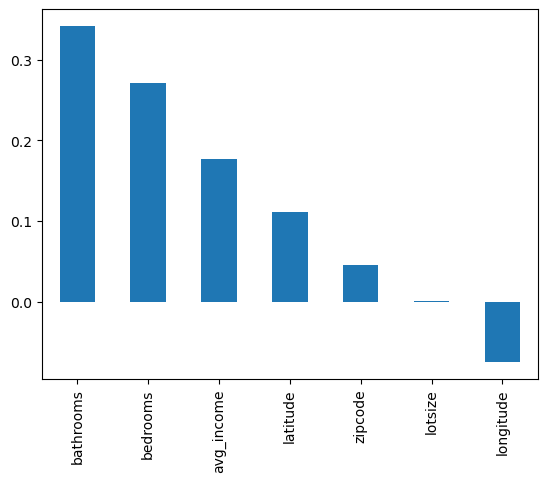

<Figure size 1400x600 with 0 Axes>

In [7]:
corr_with_price = House_FT_df.corr()['price'].sort_values(ascending=False)
corr_with_price.drop('price').plot.bar()
plt.figure(figsize=(14,6))
plt.show()

In [8]:
# Pairplots  


In [9]:
# scale all data
scaler = StandardScaler()
scaler.fit(House_FT_df)
scaled_data = scaler.transform(House_FT_df)


In [10]:
#create dataframe with scaled data
House_FT_scaled_df = pd.DataFrame(scaled_data, columns=House_FT_df.columns)

# view scaled data
House_FT_scaled_df.head()

,zipcode,bathrooms,latitude,longitude,bedrooms,price,avg_income,lotsize
0,-1.824635,-1.517354,0.174734,1.049330,-1.523789,-0.185107,-0.799355,-0.014767
1,-1.824635,-0.499931,-0.277602,0.893790,0.607112,0.370628,-0.799355,-0.014608
2,-1.824635,-1.517354,-0.245931,0.695280,-1.523789,-0.217525,-0.799355,-0.014448
3,-1.824635,0.517493,-0.412899,0.985241,0.607112,0.497983,-0.799355,-0.014129
4,-1.824635,-0.499931,-0.283632,1.036293,-0.458338,-0.208262,-0.799355,-0.013810


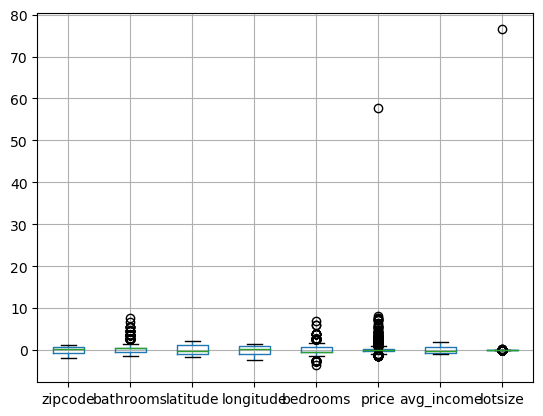

In [11]:
# plot all data (boxplot)
boxplot = House_FT_scaled_df.boxplot()

In [12]:
# get description
House_FT_scaled_df.describe()

,zipcode,bathrooms,latitude,longitude,bedrooms,price,avg_income,lotsize
count,5.851000e+03,5.851000e+03,5.851000e+03,5.851000e+03,5.851000e+03,5.851000e+03,5.851000e+03,5.851000e+03
mean,-2.665841e-14,-1.360123e-16,9.715163e-16,-1.529167e-13,1.165820e-16,1.214395e-16,3.108852e-16,-2.428791e-18
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00
min,-1.824635e+00,-1.517354e+00,-1.695302e+00,-2.263095e+00,-3.654689e+00,-1.423237e+00,-9.583043e-01,-1.636382e-02
25%,-7.889407e-01,-4.999305e-01,-8.405543e-01,-9.780563e-01,-4.583384e-01,-3.067143e-01,-7.993554e-01,-1.460785e-02
50%,1.316770e-01,5.174933e-01,-2.476540e-01,1.753147e-01,-4.583384e-01,-1.156401e-01,-2.220742e-01,-1.428862e-02
75%,7.070630e-01,5.174933e-01,1.100178e+00,9.189489e-01,6.071118e-01,1.738050e-01,8.067291e-01,-1.317076e-02
max,1.282449e+00,7.639460e+00,2.107250e+00,1.549095e+00,6.999813e+00,5.762285e+01,1.811159e+00,7.648303e+01


In [13]:
# drop outlier
House_FT_scaled_df = House_FT_scaled_df.loc[House_FT_scaled_df['lotsize'] < 7]
House_FT_scaled_df.head()

,zipcode,bathrooms,latitude,longitude,bedrooms,price,avg_income,lotsize
0,-1.824635,-1.517354,0.174734,1.049330,-1.523789,-0.185107,-0.799355,-0.014767
1,-1.824635,-0.499931,-0.277602,0.893790,0.607112,0.370628,-0.799355,-0.014608
2,-1.824635,-1.517354,-0.245931,0.695280,-1.523789,-0.217525,-0.799355,-0.014448
3,-1.824635,0.517493,-0.412899,0.985241,0.607112,0.497983,-0.799355,-0.014129
4,-1.824635,-0.499931,-0.283632,1.036293,-0.458338,-0.208262,-0.799355,-0.013810


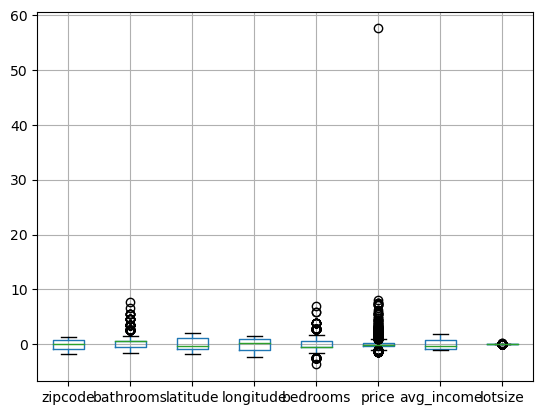

In [14]:
# plot all data again to see outliers
boxplot = House_FT_scaled_df.boxplot()

In [15]:
# check row count to ensure outlier was dropped
House_FT_scaled_df.count()

zipcode       5850
bathrooms     5850
latitude      5850
longitude     5850
bedrooms      5850
price         5850
avg_income    5850
lotsize       5850
dtype: int64

In [16]:
# drop outlier in price column
House_FT_scaled_df = House_FT_scaled_df.loc[House_FT_scaled_df['price'] < 57]
House_FT_scaled_df.head()

,zipcode,bathrooms,latitude,longitude,bedrooms,price,avg_income,lotsize
0,-1.824635,-1.517354,0.174734,1.049330,-1.523789,-0.185107,-0.799355,-0.014767
1,-1.824635,-0.499931,-0.277602,0.893790,0.607112,0.370628,-0.799355,-0.014608
2,-1.824635,-1.517354,-0.245931,0.695280,-1.523789,-0.217525,-0.799355,-0.014448
3,-1.824635,0.517493,-0.412899,0.985241,0.607112,0.497983,-0.799355,-0.014129
4,-1.824635,-0.499931,-0.283632,1.036293,-0.458338,-0.208262,-0.799355,-0.013810


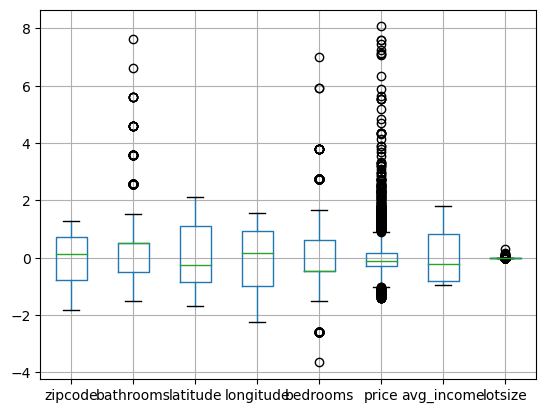

In [17]:
# plot all data again to see outliers
boxplot = House_FT_scaled_df.boxplot()

In [18]:
# check row count
House_FT_scaled_df.count()

zipcode       5849
bathrooms     5849
latitude      5849
longitude     5849
bedrooms      5849
price         5849
avg_income    5849
lotsize       5849
dtype: int64

In [19]:
# split into target and features 
X = pd.DataFrame(data=House_FT_scaled_df, columns=['zipcode', 'bathrooms', 'bedrooms', 'avg_income','lotsize'])
y = pd.DataFrame(data=House_FT_scaled_df, columns=['price'])

In [20]:
# split into test and train sets using the standard (75/25) split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [21]:
# instantiate model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# run model
y_pred = model.predict(X_test)

In [23]:
# see resutls
print(y_pred.shape)

(1463, 1)


In [24]:
# check r2 score
print(r2_score(y_test, y_pred))

0.44364736670099847


### Two things to try to raise the r^2:  Add more features and calculate r^2 adjusted.

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

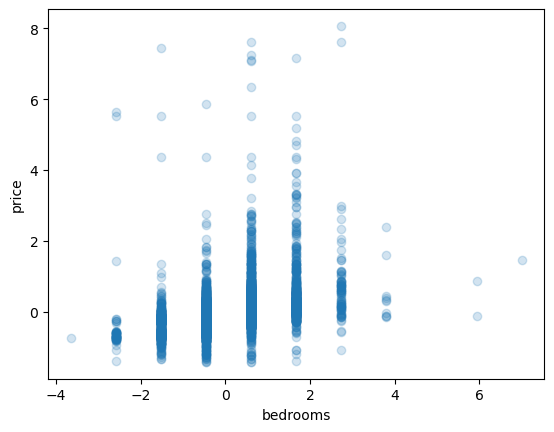

In [25]:
# Seaborn plot to show relationship between bedrooms and price
sns.regplot(x = "bedrooms", y="price", data=House_FT_scaled_df, fit_reg = False, scatter_kws={"alpha": 0.2})


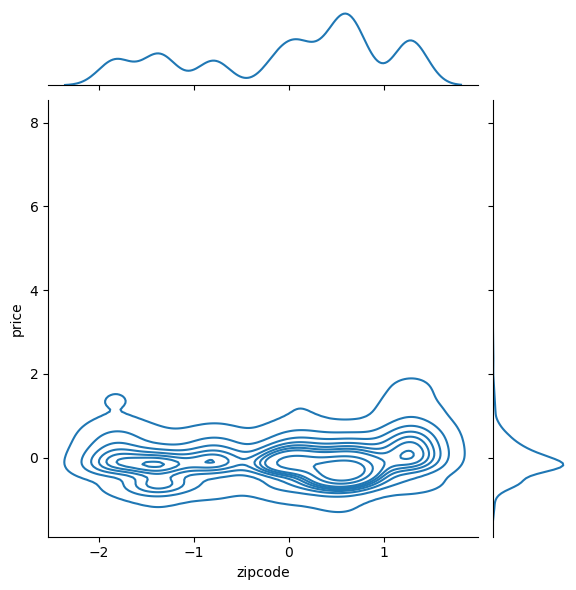

In [26]:
# seaborn plot to show relationship between bedrooms and price
sns.jointplot(x = "zipcode", y="price", data=House_FT_scaled_df, kind = 'kde')


### Predictions from our linear regression model

In [27]:
y_pred = model.predict(X_test)

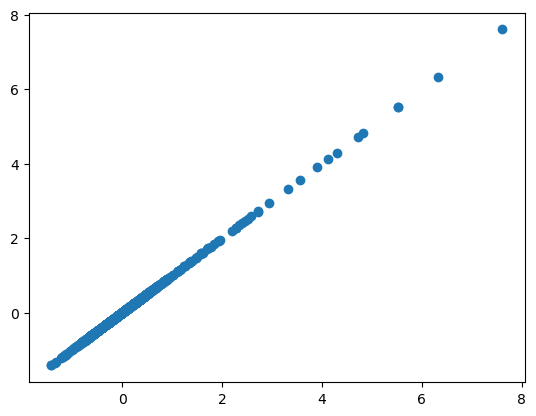

In [28]:
plt.scatter(y_test,y_test)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16656\3603801925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50);


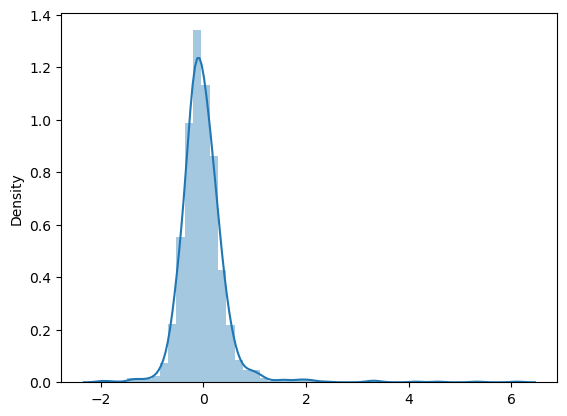

In [29]:
sns.distplot((y_test-y_pred),bins=50);

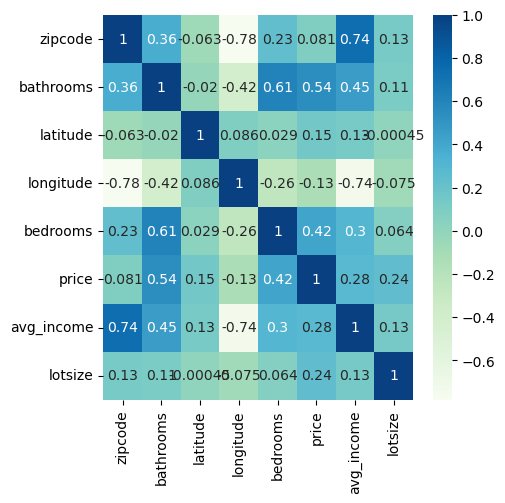

In [30]:
# correlation heat map
plt.figure(figsize=(5,5))
sns.heatmap(House_FT_scaled_df.corr(),
            cmap='GnBu',
           annot=True);

### Regression evaluation metrics

In [31]:
# Compare robustness

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.29715663070617604
MSE: 0.24490605993728054
RMSE: 0.49487984393919354
